In [1]:
from pyspark.sql import SparkSession
from pyspark import SparkContext
import os
from pyspark.sql.functions import col, lit, to_date, split, when, coalesce, count, udf
from pyspark.sql.types import MapType, StringType

In [2]:
spark = SparkSession.builder \
                    .appName('tennis') \
                    .getOrCreate()

In [3]:
folders = ["singles/", "doubles/", "futures/", "qual_chal/"]
file_columns = []
files65 = []
files49= []

In [4]:
for folder in folders:
    for filename in os.listdir(folder):
    
        file_path = os.path.join(folder, filename)
        
        df = spark.read.option("header", "true") \
                       .option("inferSchema", "true") \
                       .csv(file_path)
        
        #file_columns.append({filename:df.columns})
        file_columns.append(df.columns)
        if len(df.columns) == 65:
            files65.append(filename)
        else:
            files49.append(filename)

In [5]:
# Removing duplicates
file_columns = list(set(map(tuple, file_columns)))
file_columns = [list(item) for item in file_columns]
file_columns

[['tourney_id',
  'tourney_name',
  'surface',
  'draw_size',
  'tourney_level',
  'tourney_date',
  'match_num',
  'winner_id',
  'winner_seed',
  'winner_entry',
  'winner_name',
  'winner_hand',
  'winner_ht',
  'winner_ioc',
  'winner_age',
  'loser_id',
  'loser_seed',
  'loser_entry',
  'loser_name',
  'loser_hand',
  'loser_ht',
  'loser_ioc',
  'loser_age',
  'score',
  'best_of',
  'round',
  'minutes',
  'w_ace',
  'w_df',
  'w_svpt',
  'w_1stIn',
  'w_1stWon',
  'w_2ndWon',
  'w_SvGms',
  'w_bpSaved',
  'w_bpFaced',
  'l_ace',
  'l_df',
  'l_svpt',
  'l_1stIn',
  'l_1stWon',
  'l_2ndWon',
  'l_SvGms',
  'l_bpSaved',
  'l_bpFaced',
  'winner_rank',
  'winner_rank_points',
  'loser_rank',
  'loser_rank_points'],
 ['tourney_id',
  'tourney_name',
  'surface',
  'draw_size',
  'tourney_level',
  'tourney_date',
  'match_num',
  'winner1_id',
  'winner2_id',
  'winner_seed',
  'winner_entry',
  'loser1_id',
  'loser2_id',
  'loser_seed',
  'loser_entry',
  'score',
  'best_of',
 

In [6]:
print(f"Number of different column sets: {len(file_columns)}")
print(f"Number of columns in the first set: {len(file_columns[0])}")
print(f"Number of columns in the second set: {len(file_columns[1])}")

Number of different column sets: 2
Number of columns in the first set: 49
Number of columns in the second set: 65


In [7]:
col1 = set(file_columns[0])
col2 = set(file_columns[1])
diff1 = col1 - col2 # Columns in Doubles files that are not in Singles files
diff2 = col2 - col1 # Columns in Singles files that are not in Doubles files
# ^ to get both

In [8]:
diff1

{'loser_age',
 'loser_hand',
 'loser_ht',
 'loser_id',
 'loser_ioc',
 'loser_name',
 'loser_rank',
 'loser_rank_points',
 'winner_age',
 'winner_hand',
 'winner_ht',
 'winner_id',
 'winner_ioc',
 'winner_name',
 'winner_rank',
 'winner_rank_points'}

In [9]:
diff2

{'loser1_age',
 'loser1_hand',
 'loser1_ht',
 'loser1_id',
 'loser1_ioc',
 'loser1_name',
 'loser1_rank',
 'loser1_rank_points',
 'loser2_age',
 'loser2_hand',
 'loser2_ht',
 'loser2_id',
 'loser2_ioc',
 'loser2_name',
 'loser2_rank',
 'loser2_rank_points',
 'winner1_age',
 'winner1_hand',
 'winner1_ht',
 'winner1_id',
 'winner1_ioc',
 'winner1_name',
 'winner1_rank',
 'winner1_rank_points',
 'winner2_age',
 'winner2_hand',
 'winner2_ht',
 'winner2_id',
 'winner2_ioc',
 'winner2_name',
 'winner2_rank',
 'winner2_rank_points'}

In [10]:
# Files with 65 columns
files65

['atp_matches_doubles_2010.csv',
 'atp_matches_doubles_2012.csv',
 'atp_matches_doubles_2016.csv',
 'atp_matches_doubles_2003.csv',
 'atp_matches_doubles_2000.csv',
 'atp_matches_doubles_2008.csv',
 'atp_matches_doubles_2018.csv',
 'atp_matches_doubles_2004.csv',
 'atp_matches_doubles_2002.csv',
 'atp_matches_doubles_2001.csv',
 'atp_matches_doubles_2005.csv',
 'atp_matches_doubles_2006.csv',
 'atp_matches_doubles_2007.csv',
 'atp_matches_doubles_2020.csv',
 'atp_matches_doubles_2013.csv',
 'atp_matches_doubles_2019.csv',
 'atp_matches_doubles_2017.csv',
 'atp_matches_doubles_2014.csv',
 'atp_matches_doubles_2015.csv',
 'atp_matches_doubles_2011.csv',
 'atp_matches_doubles_2009.csv']

In [11]:
# Files with 49 columns
files49

['atp_matches_1978.csv',
 'atp_matches_1998.csv',
 'atp_matches_1980.csv',
 'atp_matches_1996.csv',
 'atp_matches_2022.csv',
 'atp_matches_1997.csv',
 'atp_matches_1989.csv',
 'atp_matches_2007.csv',
 'atp_matches_2003.csv',
 'atp_matches_1972.csv',
 'atp_matches_2005.csv',
 'atp_matches_1971.csv',
 'atp_matches_1976.csv',
 'atp_matches_1992.csv',
 'atp_matches_2021.csv',
 'atp_matches_1968.csv',
 'atp_matches_1979.csv',
 'atp_matches_2009.csv',
 'atp_matches_1983.csv',
 'atp_matches_1995.csv',
 'atp_matches_1977.csv',
 'atp_matches_2002.csv',
 'atp_matches_2016.csv',
 'atp_matches_1981.csv',
 'atp_matches_2011.csv',
 'atp_matches_2018.csv',
 'atp_matches_2020.csv',
 'atp_matches_1994.csv',
 'atp_matches_1970.csv',
 'atp_matches_2019.csv',
 'atp_matches_2013.csv',
 'atp_matches_1973.csv',
 'atp_matches_1988.csv',
 'atp_matches_2010.csv',
 'atp_matches_1982.csv',
 'atp_matches_2012.csv',
 'atp_matches_2008.csv',
 'atp_matches_2017.csv',
 'atp_matches_1984.csv',
 'atp_matches_1999.csv',


In [12]:
#HELENA

In [13]:
singles=spark.read.option("header","true").option("inferSchema","true") \
.csv('singles')

singles = singles.withColumn(
    "Origin",
    lit('Singles')
)

doubles=spark.read.option("header","true").option("inferSchema","true") \
.csv('doubles')

doubles = doubles.withColumn(
    "Origin",
    lit('Doubles')
)

futures=spark.read.option("header","true").option("inferSchema","true") \
.csv('futures')

futures = futures.withColumn(
    "Origin",
    lit('Futures')
)

qual_chal = spark.read.option("header","true").option("inferSchema","true") \
.csv('qual_chal')

qual_chal = qual_chal.withColumn(
    "Origin",
    lit('Qualificacao_Challenger')
)

amat = spark.read.option("header","true").option("inferSchema","true") \
.csv('atp_matches_amateur.csv')

amat = amat.withColumn(
    "Origin",
    lit('Amateur')
)

In [66]:
matches_completos = singles.unionAll(futures)
matches_completos = matches_completos.unionAll(qual_chal)
matches_completos=matches_completos.unionAll(amat)

In [67]:
colunas_unicas_doubles = list(set(doubles.columns) - set(matches_completos.columns))

for a in colunas_unicas_doubles:
    matches_completos = matches_completos.withColumn(
    a,
    lit(None)
)

sorted_columns = sorted(matches_completos.columns)
matches_completos = matches_completos.select(*sorted_columns)

In [68]:
colunas_unicas_matches_completos = list(set(matches_completos.columns) - set(doubles.columns))

for a in colunas_unicas_matches_completos:
    doubles = doubles.withColumn(
    a,
    lit(None)
)

In [69]:
sorted_columns = sorted(doubles.columns)
doubles = doubles.select(*sorted_columns)
matches_completos=matches_completos.unionAll(doubles)

In [70]:
len(matches_completos.columns)

82

In [71]:
matches_completos.select('tourney_id').show()
matches=matches_completos

+----------+
|tourney_id|
+----------+
|  1994-339|
|  1994-339|
|  1994-339|
|  1994-339|
|  1994-339|
|  1994-339|
|  1994-339|
|  1994-339|
|  1994-339|
|  1994-339|
|  1994-339|
|  1994-339|
|  1994-339|
|  1994-339|
|  1994-339|
|  1994-339|
|  1994-339|
|  1994-339|
|  1994-339|
|  1994-339|
+----------+
only showing top 20 rows



In [72]:
#LARA

In [73]:
# Listing all columns with the type 'void' and converting to int
void_columns = [col_name for col_name, data_type in matches.dtypes if data_type == 'void']
for col_name in void_columns:
    matches = matches.withColumn(col_name, matches[col_name].cast("int"))

In [74]:
# Converting to int
columns_to_convert = ["draw_size", "loser_id","loser_seed", "best_of", "minutes", "winner_seed",
    "w_ace", "w_df", "w_svpt", "w_1stIn", "w_1stWon", "w_2ndWon", "w_SvGms", "w_bpSaved", "w_bpFaced",
    "l_ace", "l_df", "l_svpt", "l_1stIn", "l_1stWon", "l_2ndWon", "l_SvGms", "l_bpSaved", "l_bpFaced",
    "winner_rank", "loser_rank", "winner_rank_points", "loser_rank_points", "winner2_hand"
]
for column in columns_to_convert:
    matches = matches.withColumn(column, col(column).cast("integer"))

In [75]:
matches = matches.withColumn("tourney_date", to_date(matches["tourney_date"].cast("string"), "yyyyMMdd"))
matches = matches.withColumn("winner_age", matches["winner_age"].cast("double"))

In [76]:
# Function to get scores for each set
def extrair_sets(scores):
    if scores:
        sets = scores.split(' ')
    else:
        sets = []
    set_values = {}

    if sets:
        for i, set_score in enumerate(sets):
            try:
                set_values[f"set_{i+1}"] = int(set_score)
            except ValueError:
                set_values[f"set_{i+1}"] = set_score

    return set_values

extrair_sets_udf = udf(extrair_sets, MapType(StringType(), StringType()))

# New column with the scores for each set
matches = matches.withColumn("sets", extrair_sets_udf(col("score")))
for i in range(1, 6):  
    matches = matches.withColumn(f"set_{i}", when(col("sets").getItem(f"set_{i}").isNull(), None).otherwise(col("sets").getItem(f"set_{i}")))

matches = matches.drop("sets")

In [197]:
matches.select("set_1", "set_2", "set_3", "set_4", "set_5").show(50)

+------+------+------+-----+-----+
| set_1| set_2| set_3|set_4|set_5|
+------+------+------+-----+-----+
|   6-2|   6-2|  NULL| NULL| NULL|
|   6-3|   4-6|   6-2| NULL| NULL|
|   6-4|   6-3|  NULL| NULL| NULL|
|   6-3|   6-2|  NULL| NULL| NULL|
|   6-4|   6-2|  NULL| NULL| NULL|
|   4-6|   6-1|   6-3| NULL| NULL|
|6-7(3)|   6-3|   6-4| NULL| NULL|
|   6-4|   6-4|  NULL| NULL| NULL|
|   6-2|   7-5|  NULL| NULL| NULL|
|   6-2|7-6(2)|  NULL| NULL| NULL|
|   6-1|   6-4|  NULL| NULL| NULL|
|   6-4|   6-2|  NULL| NULL| NULL|
|   6-3|   4-6|   6-2| NULL| NULL|
|   6-3|7-6(6)|  NULL| NULL| NULL|
|   6-4|   6-4|  NULL| NULL| NULL|
|7-6(4)|   6-3|  NULL| NULL| NULL|
|7-6(3)|   4-6|   6-4| NULL| NULL|
|   4-6|   6-2|7-6(2)| NULL| NULL|
|   6-4|   6-1|  NULL| NULL| NULL|
|   6-4|   6-2|  NULL| NULL| NULL|
|   6-3|   3-6|   6-3| NULL| NULL|
|   6-3|   3-6|   6-4| NULL| NULL|
|6-7(5)|   6-3|   6-4| NULL| NULL|
|7-6(2)|   6-3|  NULL| NULL| NULL|
|   3-6|   6-3|7-6(5)| NULL| NULL|
|   5-7|   6-3|   7-

In [78]:
matches.filter(matches["set_5"].isNotNull()).select("set_5").show(10)

+-----+
|set_5|
+-----+
|  6-1|
|  8-6|
|  6-2|
|  6-4|
|  6-2|
|  8-6|
|  6-3|
|  RET|
|  6-2|
|  6-4|
+-----+
only showing top 10 rows



In [79]:
matches.printSchema()

root
 |-- Origin: string (nullable = false)
 |-- best_of: integer (nullable = true)
 |-- draw_size: integer (nullable = true)
 |-- l_1stIn: integer (nullable = true)
 |-- l_1stWon: integer (nullable = true)
 |-- l_2ndWon: integer (nullable = true)
 |-- l_SvGms: integer (nullable = true)
 |-- l_ace: integer (nullable = true)
 |-- l_bpFaced: integer (nullable = true)
 |-- l_bpSaved: integer (nullable = true)
 |-- l_df: integer (nullable = true)
 |-- l_svpt: integer (nullable = true)
 |-- loser1_age: double (nullable = true)
 |-- loser1_hand: string (nullable = true)
 |-- loser1_ht: integer (nullable = true)
 |-- loser1_id: integer (nullable = true)
 |-- loser1_ioc: string (nullable = true)
 |-- loser1_name: string (nullable = true)
 |-- loser1_rank: integer (nullable = true)
 |-- loser1_rank_points: integer (nullable = true)
 |-- loser2_age: double (nullable = true)
 |-- loser2_hand: string (nullable = true)
 |-- loser2_ht: integer (nullable = true)
 |-- loser2_id: integer (nullable = tr

In [80]:
doubles_columns = ['winner1_age', 'winner1_hand', 'winner1_ht', 'winner1_id', 'winner1_ioc', 'winner1_name', 'winner1_rank', 'winner1_rank_points', 'loser1_age', 'loser1_hand', 'loser1_ht', 'loser1_id', 'loser1_ioc', 'loser1_name', 'loser1_rank', 'loser1_rank_points']
singles_columns = ['winner_age', 'winner_hand', 'winner_ht', 'winner_id', 'winner_ioc', 'winner_name', 'winner_rank', 'winner_rank_points', 'loser_age', 'loser_hand', 'loser_ht', 'loser_id', 'loser_ioc', 'loser_name', 'loser_rank', 'loser_rank_points']

In [81]:
# Transferring the records in singles-related columns to doubles-related columns
for i in range(len(doubles_columns)):
    matches = matches.withColumn(f"{doubles_columns[i]}", coalesce(matches[f"{singles_columns[i]}"], matches[f"{doubles_columns[i]}"]))

In [82]:
# Dropping the columns not needed
matches = matches.drop(*singles_columns)

In [83]:
# 65 + Origin + 5 sets = 71
len(matches.columns)

71

In [84]:
# BEA

In [85]:
matches

DataFrame[Origin: string, best_of: int, draw_size: int, l_1stIn: int, l_1stWon: int, l_2ndWon: int, l_SvGms: int, l_ace: int, l_bpFaced: int, l_bpSaved: int, l_df: int, l_svpt: int, loser1_age: double, loser1_hand: string, loser1_ht: int, loser1_id: int, loser1_ioc: string, loser1_name: string, loser1_rank: int, loser1_rank_points: int, loser2_age: double, loser2_hand: string, loser2_ht: int, loser2_id: int, loser2_ioc: string, loser2_name: string, loser2_rank: int, loser2_rank_points: int, loser_entry: string, loser_seed: int, match_num: int, minutes: int, round: string, score: string, surface: string, tourney_date: date, tourney_id: string, tourney_level: string, tourney_name: string, w_1stIn: int, w_1stWon: int, w_2ndWon: int, w_SvGms: int, w_ace: int, w_bpFaced: int, w_bpSaved: int, w_df: int, w_svpt: int, winner1_age: double, winner1_hand: string, winner1_ht: int, winner1_id: int, winner1_ioc: string, winner1_name: string, winner1_rank: int, winner1_rank_points: int, winner2_age: 

In [87]:
print("-------------------------------------------")
# Count null values in 'Origin' column
null_count = matches.select('Origin').where(col('Origin').isNull()).count()
# Count total values set_1
total_values = matches.select('set_1').count()
print(f"Total null values in 'Origin' column: {null_count}")
print(f"Total values in 'set_1' column: {total_values}")
print("-------------------------------------------")




# Only use until winnner_seed, set_1, set_2, etc... were throwing errors
relevant_columns = matches.columns[: matches.columns.index('winner_seed') + 1]  # Add 1 for inclusive indexing

# Calculate null values counts
null_columns = []
for column in relevant_columns:
    null_value_counts = matches.select(column).where(col(column).isNull()).count()
    # Percentage of null values
    percentage = (null_value_counts / matches.select(column).count()) * 100
    # Print the results
    print(f"Column name: {column} has a total of {null_value_counts} null values and percentage of nulls: {percentage:.2f}%")
    
    
    # If percentage of nulls superior to 75% delete column?
    if percentage >= 75:
        null_columns.append(column)

print("-------------------------------------------")
print("Columns with null percentage superior to 75%")
for column_null in null_columns:
    print(f"Column name: {column_null}")

-------------------------------------------
Total null values in 'Origin' column: 0
Total values in 'set_1' column: 935359
-------------------------------------------
Column name: Origin has a total of 0 null values and percentage of nulls: 0.00%
Column name: best_of has a total of 0 null values and percentage of nulls: 0.00%
Column name: draw_size has a total of 2477 null values and percentage of nulls: 0.26%
Column name: l_1stIn has a total of 730169 null values and percentage of nulls: 78.06%
Column name: l_1stWon has a total of 730169 null values and percentage of nulls: 78.06%
Column name: l_2ndWon has a total of 730169 null values and percentage of nulls: 78.06%
Column name: l_SvGms has a total of 730170 null values and percentage of nulls: 78.06%
Column name: l_ace has a total of 730169 null values and percentage of nulls: 78.06%
Column name: l_bpFaced has a total of 730169 null values and percentage of nulls: 78.06%
Column name: l_bpSaved has a total of 730169 null values and p

In [88]:
matches.repartition(1).write.csv("matches", mode='overwrite')

In [89]:
matches.printSchema()

root
 |-- Origin: string (nullable = false)
 |-- best_of: integer (nullable = true)
 |-- draw_size: integer (nullable = true)
 |-- l_1stIn: integer (nullable = true)
 |-- l_1stWon: integer (nullable = true)
 |-- l_2ndWon: integer (nullable = true)
 |-- l_SvGms: integer (nullable = true)
 |-- l_ace: integer (nullable = true)
 |-- l_bpFaced: integer (nullable = true)
 |-- l_bpSaved: integer (nullable = true)
 |-- l_df: integer (nullable = true)
 |-- l_svpt: integer (nullable = true)
 |-- loser1_age: double (nullable = true)
 |-- loser1_hand: string (nullable = true)
 |-- loser1_ht: integer (nullable = true)
 |-- loser1_id: integer (nullable = true)
 |-- loser1_ioc: string (nullable = true)
 |-- loser1_name: string (nullable = true)
 |-- loser1_rank: integer (nullable = true)
 |-- loser1_rank_points: integer (nullable = true)
 |-- loser2_age: double (nullable = true)
 |-- loser2_hand: string (nullable = true)
 |-- loser2_ht: integer (nullable = true)
 |-- loser2_id: integer (nullable = tr

In [ ]:
#QUERIES, Lara
from pyspark.sql.functions import sum as spark_sum
import matplotlib.pyplot as plt


Win percentage for Roger Federer by surface:
+-------+-------------+-------------+-----------------+------------------+
|surface|total_wins_rf|total_wins_rn|win_percentage_rf| win_percentage_rn|
+-------+-------------+-------------+-----------------+------------------+
|   Clay|            2|           14|             12.5|              87.5|
|   Hard|           12|            9|57.14285714285714|42.857142857142854|
|  Grass|            3|            1|             75.0|              25.0|
+-------+-------------+-------------+-----------------+------------------+



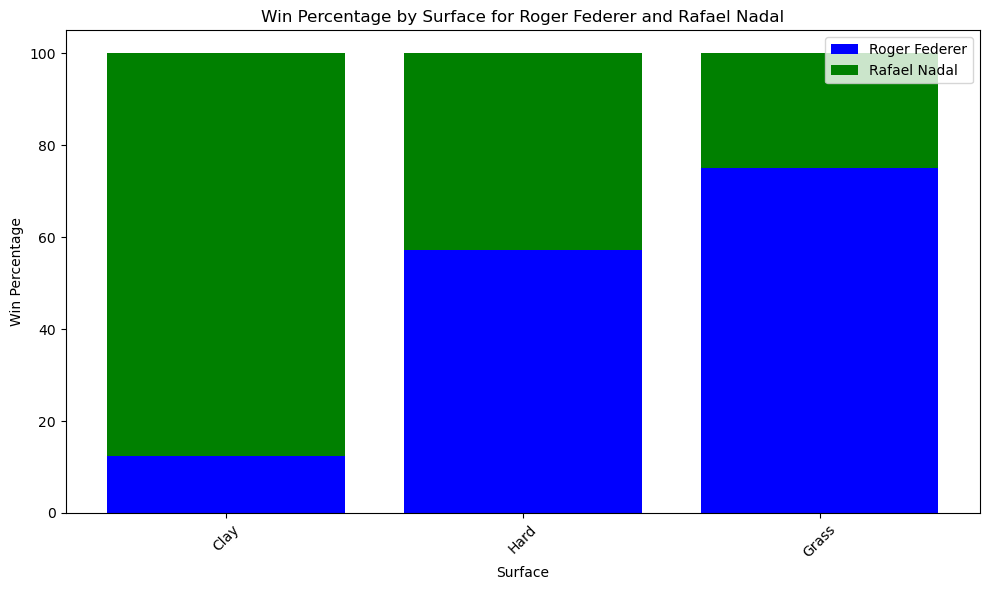

In [105]:
#Roger Federer vs Rafael Nadal. Wins for each one / percentage on each surface.

matches2 = matches.filter(
    ((matches.winner1_name == "Roger Federer") & (matches.loser1_name == "Rafael Nadal")) |
    ((matches.winner1_name == "Rafael Nadal") & (matches.loser1_name == "Roger Federer"))
)
# Calculate the total wins for each player on each surface
total_wins_surface = matches2.groupBy("surface").agg(
    spark_sum(F.when(matches2.winner1_name == "Roger Federer", 1).otherwise(0)).alias("total_wins_rf"),
    spark_sum(F.when(matches2.winner1_name == "Rafael Nadal", 1).otherwise(0)).alias("total_wins_rn")
)

# Calculate win percentages for each player on different surfaces
surface_wins_rf = total_wins_surface.withColumn("win_percentage_rf", (total_wins_surface["total_wins_rf"] / (total_wins_surface["total_wins_rf"] + total_wins_surface["total_wins_rn"])) * 100)
surface_wins = surface_wins_rf.withColumn("win_percentage_rn", (total_wins_surface["total_wins_rn"] / (total_wins_surface["total_wins_rf"] + total_wins_surface["total_wins_rn"])) * 100)

print("Win percentage for Roger Federer by surface:")
surface_wins.show()
# Extracting surface names and win percentages for both players
surfaces = surface_wins.select("surface").rdd.map(lambda row: row[0]).collect()
win_percentages_rf = surface_wins.select("win_percentage_rf").rdd.map(lambda row: row[0]).collect()
win_percentages_rn = surface_wins.select("win_percentage_rn").rdd.map(lambda row: row[0]).collect()

plt.figure(figsize=(10, 6))
plt.bar(surfaces, win_percentages_rf, color='blue', label='Roger Federer')
plt.bar(surfaces, win_percentages_rn, color='green', label='Rafael Nadal', bottom=win_percentages_rf)
plt.xlabel('Surface')
plt.ylabel('Win Percentage')
plt.title('Win Percentage by Surface for Roger Federer and Rafael Nadal')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [177]:
from pyspark.sql.functions import avg
import matplotlib.pyplot as plt
import numpy as np

avg_time_per_surface = matches.groupBy("surface").agg(avg("minutes").alias("avg_time"))
avg_time_per_surface_df = avg_time_per_surface.toPandas()
print(avg_time_per_surface_df)
avg_time_per_surface_df

  surface    avg_time
0  Carpet   91.618310
1    Clay  101.223521
2    Hard   97.559373
3   Grass  104.998727
4    None         NaN


,surface,avg_time
0,Carpet,91.618310
1,Clay,101.223521
2,Hard,97.559373
3,Grass,104.998727
4,None,NaN


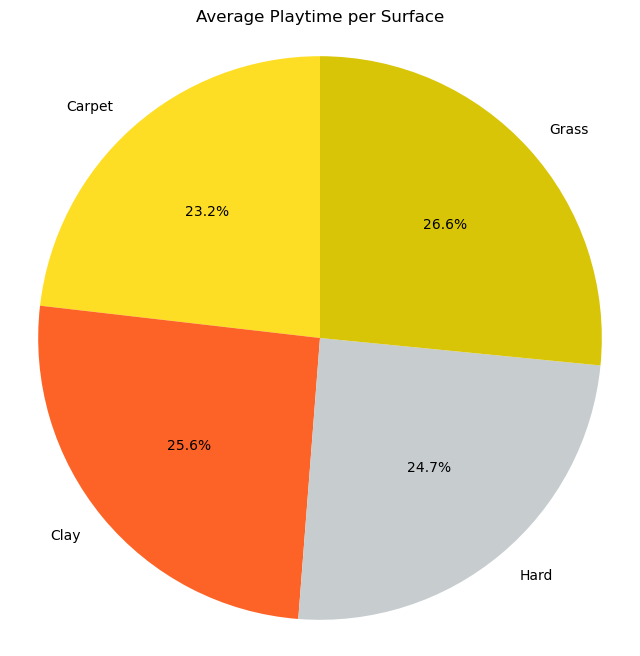

In [176]:

surfaces = avg_time_per_surface.select("surface").rdd.map(lambda row: row[0]).collect()
time = avg_time_per_surface.select("avg_time").rdd.map(lambda row: row[0]).collect()


# Filter out NaN values from the time list
valid_time = [t for t in time if isinstance(t, float) and not np.isnan(t)]

# Define colors using hex color codes
colors = ['#FEDE24', '#fd6326', '#c7cccf', '#d8c508']

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(valid_time, labels=surfaces[:len(valid_time)], autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Average Playtime per Surface')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

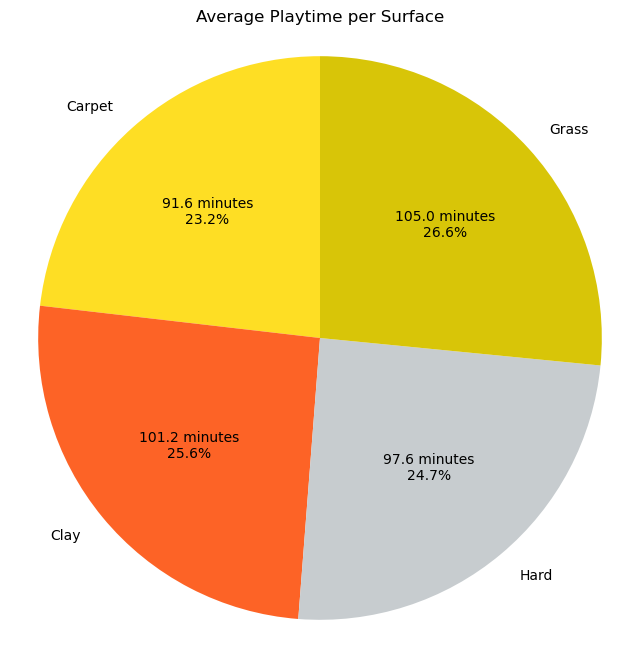

In [121]:
#add numerical time
plt.figure(figsize=(8, 8))
patches, texts, autotexts = plt.pie(valid_time, labels=surfaces[:len(valid_time)], autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Average Playtime per Surface')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adding numerical values and percentage as annotations
for i, (patch, autotext) in enumerate(zip(patches, autotexts)):
    time_value = valid_time[i]
    percentage = autotext.get_text()
    autotext.set_color('black')
    autotext.set_fontsize(10)
    autotext.set_text(f'{time_value:.1f} minutes\n{percentage}')

plt.show()



In [161]:
#Top 3 players with the biggest winning percentage per surface

from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, rank
from pyspark.sql.window import Window


player_surface_stats = matches_filtered.groupBy("surface", "winner1_name")

# Calculate the total matches for each player on each surface
player_surface_stats = matches_filtered.groupBy("surface", "winner1_name").agg(
    count("*").alias("total_matches")
)

# Define a window specification to rank players by winning percentage within each surface
window_spec = Window.partitionBy("surface").orderBy(col("total_matches").desc())

# Rank the players based on total matches for each surface
ranked_players_per_surface = player_surface_stats.withColumn(
    "rank", rank().over(window_spec)
)

# Filter to get the top 3 players per surface
top_3_players_per_surface = ranked_players_per_surface.filter(col("rank") <= 4)

# Show the top 3 players per surface
top_3_players_per_surface.show()



+-------+--------------------+-------------+----+
|surface|        winner1_name|total_matches|rank|
+-------+--------------------+-------------+----+
| Carpet|       Jimmy Connors|          355|   1|
| Carpet|        John McEnroe|          352|   2|
| Carpet|          Ivan Lendl|          271|   3|
| Carpet|         Arthur Ashe|          258|   4|
| Carpet|        Boris Becker|          258|   4|
|   Clay|Ruben Ramirez Hid...|          682|   1|
|   Clay|     Guillermo Vilas|          676|   2|
|   Clay|      Carlos Berlocq|          626|   3|
|   Clay|      Manuel Orantes|          580|   4|
|  Grass|        Ken Rosewall|          216|   1|
|  Grass|       John Newcombe|          211|   2|
|  Grass|         Roy Emerson|          205|   3|
|  Grass|       Roger Federer|          201|   4|
|   Hard|       Roger Federer|          848|   1|
|   Hard|           Bob Bryan|          770|   2|
|   Hard|      Novak Djokovic|          739|   3|
|   Hard|         Yen Hsun Lu|          623|   4|


In [162]:
#that's not it. let's try differently
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, rank, sum as spark_sum
from pyspark.sql.window import Window

matches_filtered = matches.filter(col("surface").isNotNull())

player_surface_stats = matches_filtered.groupBy("surface", "winner1_name").agg(
    count("*").alias("total_wins")
)

player_surface_stats.show(2)

loser_surface_stats = matches_filtered.groupBy("surface", "loser1_name").agg(
    count("*").alias("total_losses")
)

loser_surface_stats.show(2)


+-------+---------------+----------+
|surface|   winner1_name|total_wins|
+-------+---------------+----------+
| Carpet|Tomas Carbonell|        18|
| Carpet|  Karel Novacek|        57|
+-------+---------------+----------+
only showing top 2 rows

+-------+---------------+------------+
|surface|    loser1_name|total_losses|
+-------+---------------+------------+
| Carpet|Tomas Carbonell|          33|
| Carpet|  Karel Novacek|          64|
+-------+---------------+------------+
only showing top 2 rows



In [163]:
from pyspark.sql.functions import sum

# Join the winner and loser statistics
player_stats = player_surface_stats.join(
    loser_surface_stats,
    (player_surface_stats.surface == loser_surface_stats.surface) &
    (player_surface_stats.winner1_name == loser_surface_stats.loser1_name),
    "full_outer"
).groupBy(player_surface_stats.surface, player_surface_stats.winner1_name.alias("player_name")).agg(
    (sum(player_surface_stats.total_wins) + sum(loser_surface_stats.total_losses)).alias("total_games"),
    sum(player_surface_stats.total_wins).alias("total_wins")
)

# Show the top 4 rows of the resulting DataFrame
player_stats.show(10)


+-------+--------------------+-----------+----------+
|surface|         player_name|total_games|total_wins|
+-------+--------------------+-----------+----------+
| Carpet|Alexandros Georgo...|          4|         1|
| Carpet|        Daniel Fiala|          8|         1|
| Carpet|         Dejan Katic|          5|         2|
| Carpet|Fernando Dalla Fo...|       NULL|         1|
| Carpet|       Frederico Gil|          2|         1|
| Carpet| Ivan Gomez Mantilla|          6|         2|
| Carpet|         Juraj Hasko|         10|         6|
| Carpet|       Karel Novacek|        121|        57|
| Carpet|          Pavel Riha|         57|        31|
| Carpet|Rafael Avalos Brenes|          3|         1|
+-------+--------------------+-----------+----------+
only showing top 10 rows



In [164]:

# Calculate winning percentage
player_stats = player_stats.withColumn(
    "winning_percentage",
    (col("total_wins") / col("total_games")) * 100
)

window_spec = Window.partitionBy(player_stats.surface).orderBy(player_stats.winning_percentage.desc())

# Assign ranks to players within each surface based on winning_percentage
player_stats_ranked = player_stats.withColumn("rank", rank().over(window_spec))

# Filter to show only the top 3 players for each surface, considering ties
player_stats_filtered = player_stats_ranked.filter((col("rank") <=3))

# Show the resulting DataFrame
player_stats_filtered.show()

+-------+--------------------+-----------+----------+------------------+----+
|surface|         player_name|total_games|total_wins|winning_percentage|rank|
+-------+--------------------+-----------+----------+------------------+----+
|   NULL|                NULL|       NULL|      NULL|              NULL|   1|
| Carpet|     Krister Wedenby|         19|        17| 89.47368421052632|   1|
| Carpet|  Yoshihito Nishioka|          8|         7|              87.5|   2|
| Carpet|       Leandro Riedi|          8|         7|              87.5|   2|
| Carpet|Frederico Ferreir...|          8|         7|              87.5|   2|
| Carpet|  Dmitri Tomashevich|          8|         7|              87.5|   2|
|   Clay|        Tony Trabert|         22|        20|  90.9090909090909|   1|
|   Clay|   Jean Rene Lacoste|         52|        47| 90.38461538461539|   2|
|   Clay|   Henri Jean Cochet|         65|        58| 89.23076923076924|   3|
|  Grass|           Don Budge|         71|        64| 90.1408450

In [194]:
#Percentage of times where a player lost the first set in a 3-set game and ended up winning the match.

filtered_matches = matches.filter(
    (col("set_1").isNotNull()) &
    (col("set_2").isNotNull()) &
    (col("set_3").isNotNull()) &
    (col("set_4").isNull()) &
    (col("set_5").isNull()) &
    col("set_3").like("%-%")
)

lost_first_set_and_won_match = filtered_matches.filter(
    (col("set_1").like("%-6") & col("set_2").like("6-%") & col("set_3").like("6-%")) |
    (col("set_1").like("6-%") & col("set_2").like("%-6") & col("set_3").like("%-6"))
)

total_matches_count = lost_first_set_and_won_match.count()

win_percentage = (total_matches_count / filtered_matches.count()) * 100

print("Percentage of times where a player lost the first set in a 3-set game and ended up winning the match:", win_percentage, "%")


Percentage of times where a player lost the first set in a 3-set game and ended up winning the match: 20.791349809885933 %


In [199]:
#Percentage of times where a player lost the first set in a 3-set game and ended up winning the match.
#variation
filtered_matches = matches.filter(
    (col("set_1").like("%-%")) &
    (col("set_2").like("%-%")) &
    (col("set_3").like("%-%")) &
    (col("set_4").isNull()) &
    (col("set_5").isNull())
)

lost_first_set_and_won_match = filtered_matches.filter(
    (col("set_1").like("%-6") & col("set_2").like("6-%") & col("set_3").like("6-%")) |
    (col("set_1").like("6-%") & col("set_2").like("%-6") & col("set_3").like("%-6"))
)

total_matches_count = lost_first_set_and_won_match.count()

win_percentage = (total_matches_count / filtered_matches.count()) * 100

print("Percentage of times where a player lost the first set in a 3-set game and ended up winning the match:", win_percentage, "%")


Percentage of times where a player lost the first set in a 3-set game and ended up winning the match: 20.79290278334205 %


In [200]:
#Percentage of times where a player lost the first two sets in a 5-set game and ended up winning the match.
#casos com vantagens(?) não são considerados... ex: 7-6(1)

filtered_matches = matches.filter(
    (col("set_1").like("%-%")) &
    (col("set_2").like("%-%")) &
    (col("set_3").like("%-%")) &
    (col("set_4").like("%-%")) &
    (col("set_5").like("%-%")) 
)

lost_first_set_and_won_match = filtered_matches.filter(
    (col("set_1").like("%-6") & col("set_2").like("%-6") & col("set_3").like("6-%") & col("set_4").like("6-%")& col("set_5").like("6-%")) |
    (col("set_1").like("6-%") & col("set_2").like("6-%") & col("set_3").like("%-6") & col("set_4").like("%-6")& col("set_5").like("%-6"))
)

total_matches_count = lost_first_set_and_won_match.count()

win_percentage = (total_matches_count / filtered_matches.count()) * 100

print("% of times where a player lost the first two sets in a 5-set game and ended up winning the match:", win_percentage, "%")

% of times where a player lost the first two sets in a 5-set game and ended up winning the match: 5.786054569077523 %
